In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
tickers = ['NVDA','^GSPC']
df = pd.DataFrame()

for i in tickers:
    df[i] = wb.DataReader(i, data_source = 'yahoo', start = '2015-01-01', end = '2020-01-01' )['Adj Close']


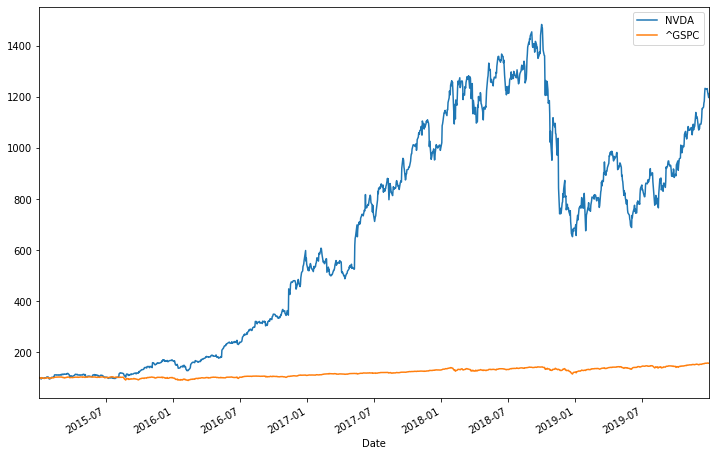

In [33]:
(df / df.iloc[0]*100).plot(figsize=(12,8))

In [15]:
df.tail(4)

,NVDA,^GSPC
Date,,
2019-12-26,239.047028,3239.909912
2019-12-27,236.728394,3240.020020
2019-12-30,232.181137,3221.290039
2019-12-31,235.159348,3230.780029


In [16]:
log_retorno = np.log(df / df.shift(1) )
log_retorno.head(4)

,NVDA,^GSPC
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.017034,-0.018447
2015-01-06,-0.030787,-0.008933
2015-01-07,-0.002609,0.011563


In [17]:
cov = log_retorno.cov()*250
cov

,NVDA,^GSPC
NVDA,0.177505,0.030303
^GSPC,0.030303,0.017980


In [19]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.030302825162122606

In [21]:
market_var = log_retorno['^GSPC'].var() * 250
market_var

0.017979592731526266

## Beta

In [23]:
nvda_beta = cov_with_market / market_var
nvda_beta

1.6854010885901882

* BETA > 1 = ATIVO AGRESSIVO
* BETA < 1 = ATIVO DEFENSIVO 
* BETA == 0 = INDEPENDENTE

### CAPM

* Retorno anual esperado da NVIDIA

In [34]:
nvda_capm = 0.025 + nvda_beta * 0.05
nvda_capm

0.1092700544295094

In [35]:
print("CAPM: {:.2%}".format(nvda_capm))

CAPM: 10.93%


### Indice de sharpe

* Sharpe ratio = ri - rf / std

In [40]:
std = (log_retorno['NVDA'].std()  *  250   **  0.5)
std

0.4213135496218926

* 2.5% é a taxa do titulo de 10 anos do tesouro americano, nos assumimos assim como essa sendo a variavel livre de risco

In [42]:
sharpe_ratio = (nvda_capm - 0.025)/std
sharpe_ratio

0.20001743239717185

### Alfa no CAPM

* a configuração padrao do CAPM assume alfa == 0